## **Food Retail Customer Analysis**

### Import Libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
import warnings
import pandas as pd
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore",category=DeprecationWarning)

### Load Data

In [2]:
dir_path = './dataset'
files = os.listdir(dir_path)

csv_files = [file for file in files if file.endswith('.csv')]

if not csv_files:
    print("No CSV files found in the directory.")
else:
    print(csv_files)

['product_lookup.csv', 'transactions.csv']


### Load transactions.csv

In [3]:
# Read a dh_transactions.csv into a DataFrame
df_transaction = pd.read_csv(dir_path + '/' + csv_files[1],header=0)

In [4]:
# Understand the structure and content of df_transaction
print(df_transaction.columns)

Index(['upc', 'dollar_sales', 'units', 'time_of_transaction', 'geography',
       'week', 'household', 'store', 'basket', 'day', 'coupon'],
      dtype='object')


In [5]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197681 entries, 0 to 5197680
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   upc                  int64  
 1   dollar_sales         float64
 2   units                int64  
 3   time_of_transaction  int64  
 4   geography            int64  
 5   week                 int64  
 6   household            int64  
 7   store                int64  
 8   basket               int64  
 9   day                  int64  
 10  coupon               int64  
dtypes: float64(1), int64(10)
memory usage: 436.2 MB


In [6]:
df_transaction.head(5)

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0


### Load product_lookup.csv

In [8]:
# Read a product_lookup.csv into a DataFrame
df_product = pd.read_csv(dir_path + '/' + csv_files[0], header=0)

In [9]:
# Understand the structure and content of df_product
print(df_product.columns)

Index(['upc', 'product_description', 'commodity', 'brand', 'product_size'], dtype='object')


In [10]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   upc                  927 non-null    int64 
 1   product_description  927 non-null    object
 2   commodity            927 non-null    object
 3   brand                927 non-null    object
 4   product_size         927 non-null    object
dtypes: int64(1), object(4)
memory usage: 36.3+ KB


In [11]:
df_product.head(5)

,upc,product_description,commodity,brand,product_size
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ
1,566300023,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,40 OZ
2,566300028,MILLER CANE SYRUP,syrups,Miller,19 OZ
3,566300029,MILLER CANE SYRUP,syrups,Miller,12 OZ
4,566300035,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,19 OZ


## **Data Cleaning**

### Handle with df_transaction

The following is the description of each column (from my understanding)
*   upc: This is a product identifier.
*   dollar_sales: This column indicates the total dollar amount of sales.
*   units: This column represents the number of units sold per transaction.
*   time_of_transaction: Refers to the distribution of transaction times.
*   geography: Although labeled as geographical regions, this column only provides *   categories (such as IDs) without specific geographical information.
*   week: Refers to the sequential order of weeks, ranging from 1 to 28 weeks.
*   household: Refers to customer accounts.
*   store: Refers to the ID of the store's zip code.
*   basket: Indicates the count of items purchased per customer.
*   day: Refers to the sequential order of days, ranging from 1 to 195 days.
*   coupon: Refers to the coupon using of customer








In [12]:
# Change the type of the "UPC" and "Household" column from long to string
df_transaction['upc'] = df_transaction['upc'].astype(str)

# Change the type of the "dollar_sales" column to 2 decimal places
df_transaction['dollar_sales'] = df_transaction['dollar_sales'].round(2)

# Change the type of the "time_of_transaction" column from long to string
df_transaction['time_of_transaction'] = df_transaction['time_of_transaction'].astype(str)

print(df_transaction.dtypes)

upc                     object
dollar_sales           float64
units                    int64
time_of_transaction     object
geography                int64
week                     int64
household                int64
store                    int64
basket                   int64
day                      int64
coupon                   int64
dtype: object


In [13]:
# Use isnull() to check for null values in each column from df_transaction
for column in df_transaction.columns:
    null_count = df_transaction[column].isnull().sum()
    print(f"Number of null values in {column} column: {null_count}")

Number of null values in upc column: 0
Number of null values in dollar_sales column: 0
Number of null values in units column: 0
Number of null values in time_of_transaction column: 0
Number of null values in geography column: 0
Number of null values in week column: 0
Number of null values in household column: 0
Number of null values in store column: 0
Number of null values in basket column: 0
Number of null values in day column: 0
Number of null values in coupon column: 0


From observation it appears that the time_of_transaction column is the time that should be in the HH:mm format.

In [14]:
# Convert time_of_transaction to HH:mm format
df_transaction_cleaned = df_transaction

# Ensure all time strings have 4 digits
df_transaction_cleaned['time_of_transaction'] = df_transaction_cleaned['time_of_transaction'].astype(str).str.zfill(4)

# Convert time_of_transaction to datetime object
df_transaction_cleaned['time_of_transaction'] = pd.to_datetime(df_transaction_cleaned['time_of_transaction'], format='%H%M')

# Convert datetime to HH:mm format
df_transaction_cleaned['time_of_transaction'] = df_transaction_cleaned['time_of_transaction'].dt.strftime('%H:%M')

In [15]:
df_transaction_cleaned.head(5)

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,7680850106,0.80,1,11:00,2,1,125434,244,1,1,0
1,3620000470,3.59,1,11:00,2,1,125434,244,1,1,0
2,1800028064,2.25,1,11:37,2,1,108320,244,2,1,0
3,9999985067,0.85,1,11:48,2,1,162016,244,3,1,0
4,9999985131,2.19,1,13:23,2,1,89437,244,4,1,0


### Handle with df_product

In [16]:
# Change the type of a "UPC" column of df_product from long to string
df_product['upc'] = df_product['upc'].astype(str)
print(df_product.dtypes)

upc                    object
product_description    object
commodity              object
brand                  object
product_size           object
dtype: object


In [17]:
# Use isnull() to check for null values in each column from df_product
for column in df_product.columns:
    null_count = df_product[column].isnull().sum()
    print(f"Number of null values in {column} column: {null_count}")

Number of null values in upc column: 0
Number of null values in product_description column: 0
Number of null values in commodity column: 0
Number of null values in brand column: 0
Number of null values in product_size column: 0


We need to inspect and cleanse the "product_size" column due to the presence of insignificant data.

In [18]:
# Filter rows where the product_size column contains "KH#" or "##"
filtered_insignificant_count = df_product[df_product['product_size'].str.contains('KH#') | df_product['product_size'].str.contains('##')].shape[0]

print("Number of rows where product_size contains 'KH#' or '##':", filtered_insignificant_count)

Number of rows where product_size contains 'KH#' or '##': 27


In [19]:
filtered_df = df_product[df_product['product_size'].str.contains('KH#') | df_product['product_size'].str.contains('##')]
print(filtered_df.head(10))

            upc             product_description    commodity         brand  \
22    923100002        BOVES RSTD GRL SCE 26 OZ  pasta sauce         Boves   
115  2409407009       DECECCO CAPELLINI    16OZ        pasta       Dececco   
116  2409407011       DECECCO SPAGHETTINI  16OZ        pasta       Dececco   
117  2409407012       DECECCO SPAGHETTI    16OZ        pasta       Dececco   
119  2409407034       DECECCO FUSILLI      16OZ        pasta       Dececco   
120  2409407040       DECECCO PENNE REGATE 16OZ        pasta       Dececco   
121  2409407041       DECECCO PENNE RIGATE 16OZ        pasta       Dececco   
142  2682500951  LA RUSSA REGULAR EGG NOODLE PL        pasta      La Russa   
151  2706457001  VITA SPELT WHOLE GRAIN EGG NOO        pasta          Vita   
198  3068434050  TREE OF LIFE REGULAR BLACKSTRA       syrups  Tree of Life   

    product_size  
22     KH# 71916  
115     KH# 8652  
116     KH# 8651  
117     KH# 8623  
119    KH# 13384  
120     KH# 8525  
121     

Cleaning "product_size"

In [20]:
import re

In [21]:
df_product_cleaned = df_product

# Define the pattern to identify strings containing "KH#" or "##"
pattern = r"KH#|##"

# Remove strings containing "KH#" or "##" from a column named "product_size"
df_product_cleaned['product_size'] = df_product_cleaned['product_size'].str.replace(pattern, "0")

# Remove dot from the "product_size" column
df_product_cleaned['product_size'] = df_product_cleaned['product_size'].str.replace(r"\.$", "")

# Extract numeric part
df_product_cleaned['numeric_size'] = df_product_cleaned['product_size'].str.extract(r"(\d+(\.\d+)?)")[0]

# Extract unit part
df_product_cleaned['product_size_unit'] = df_product_cleaned['product_size'].str.extract(r"([a-zA-Z]+)$")

print(df_product_cleaned)

            upc                   product_description      commodity  \
0     111112360             VINCENT S ORIG MARINARA S    pasta sauce   
1     566300023                   PINE MOUNTAIN SYRUP         syrups   
2     566300028                     MILLER CANE SYRUP         syrups   
3     566300029                     MILLER CANE SYRUP         syrups   
4     566300035                   PINE MOUNTAIN SYRUP         syrups   
..          ...                                   ...            ...   
922  9999985217               PRIVATE LABEL ALPHABETS          pasta   
923  9999985260    PRIVATE LABEL COMPLETE PANCAKE MIX  pancake mixes   
924  9999985261    PRIVATE LABEL COMPLETE PANCAKE MIX  pancake mixes   
925  9999985488  PRIVATE LABEL ITAL NESTED ANGEL HAIR          pasta   
926  9999985766  PRIVATE LABEL ITALIAN TRI COLORE CRE          pasta   

                     brand product_size numeric_size product_size_unit  
0                Vincent's        25 OZ           25          

C:\Users\Tan\AppData\Local\Temp\ipykernel_8504\1330960909.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_product_cleaned['product_size'] = df_product_cleaned['product_size'].str.replace(pattern, "0")
C:\Users\Tan\AppData\Local\Temp\ipykernel_8504\1330960909.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df_product_cleaned['product_size'] = df_product_cleaned['product_size'].str.replace(r"\.$", "")


In [22]:
#  Show the distribution of values within the "product_size_unit" column
grouped_counts = df_product_cleaned.groupby("product_size_unit").size().reset_index(name='count')

print(grouped_counts)

  product_size_unit  count
0              FMLY      1
1               GAL      1
2                LB     56
3             OUNCE      7
4                OZ    824
5               PET      2
6             REQST      1
7               TAG      1
8                 Z      2


In [23]:
# Find NaN in "product_size_unit"
NaN_product_size_unit = df_product_cleaned[df_product_cleaned['product_size_unit'].isna()]

# Find NaN in "numeric_size"
NaN_numeric_size = df_product_cleaned[df_product_cleaned['numeric_size'].isna()]

print("Empty values in product_size_unit:")
print(NaN_product_size_unit)

print("\nEmpty values in numeric_size:")
print(NaN_numeric_size)

Empty values in product_size_unit:
            upc             product_description      commodity          brand  \
22    923100002        BOVES RSTD GRL SCE 26 OZ    pasta sauce          Boves   
89   1800028064       H J PANCK BTRMLK COMP MIX  pancake mixes    Hungry Jack   
91   1800028066        H J BUTTERMILK PANCK MIX  pancake mixes    Hungry Jack   
92   1800028067       H J PANCK MX EX LITE COMP  pancake mixes    Hungry Jack   
115  2409407009       DECECCO CAPELLINI    16OZ          pasta        Dececco   
116  2409407011       DECECCO SPAGHETTINI  16OZ          pasta        Dececco   
117  2409407012       DECECCO SPAGHETTI    16OZ          pasta        Dececco   
119  2409407034       DECECCO FUSILLI      16OZ          pasta        Dececco   
120  2409407040       DECECCO PENNE REGATE 16OZ          pasta        Dececco   
121  2409407041       DECECCO PENNE RIGATE 16OZ          pasta        Dececco   
142  2682500951  LA RUSSA REGULAR EGG NOODLE PL          pasta       La Ru

It looks like a column product_size_unit there is still NaN. We replace NaN in the product_size_unit column with "Oz".

In [24]:
# Replace NaN in the product_size column with "Oz"
df_product_cleaned['product_size_unit'] = df_product_cleaned['product_size_unit'].fillna('Oz')

We replace NaN in the numeric_size column with "0".

In [25]:
# Replace NaN in the numeric_size column with 0
df_product_cleaned['numeric_size'] = df_product_cleaned['numeric_size'].fillna('0')

In [26]:
# Check NaN in "product_size_unit"
NaN_product_size_unit = df_product_cleaned[df_product_cleaned['product_size_unit'].isna()]

# Check NaN in "numeric_size"
NaN_numeric_size = df_product_cleaned[df_product_cleaned['numeric_size'].isna()]

print("Empty values in product_size_unit:")
print(NaN_product_size_unit)

print("\nEmpty values in numeric_size:")
print(NaN_numeric_size)

Empty values in product_size_unit:
Empty DataFrame
Columns: [upc, product_description, commodity, brand, product_size, numeric_size, product_size_unit]
Index: []

Empty values in numeric_size:
Empty DataFrame
Columns: [upc, product_description, commodity, brand, product_size, numeric_size, product_size_unit]
Index: []


In [27]:
# Concatenate numeric_size with product_size_unit
df_product_cleaned['product_size'] = df_product_cleaned['numeric_size'] + ' ' + df_product_cleaned['product_size_unit']

# Drop numeric_size and product_size_unit columns
df_product_cleaned = df_product_cleaned.drop(columns=['numeric_size' ,'product_size_unit'])

In [28]:
df_product_cleaned.head(5)

,upc,product_description,commodity,brand,product_size
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ
1,566300023,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,40 OZ
2,566300028,MILLER CANE SYRUP,syrups,Miller,19 OZ
3,566300029,MILLER CANE SYRUP,syrups,Miller,12 OZ
4,566300035,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,19 OZ


## **Exploratory Data Analysis**

In [29]:
# Perform joining of  df_transaction and df_product dataframe
df_transaction_joined = df_transaction_cleaned.merge(df_product_cleaned, on='upc', how='left')

df_transaction_joined.head(5)

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,product_description,commodity,brand,product_size
0,7680850106,0.80,1,11:00,2,1,125434,244,1,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ
1,3620000470,3.59,1,11:00,2,1,125434,244,1,1,0,BERTOLLI TOM&BASIL SAUCE,pasta sauce,Bertolli,24 OZ
2,1800028064,2.25,1,11:37,2,1,108320,244,2,1,0,H J PANCK BTRMLK COMP MIX,pancake mixes,Hungry Jack,0 Oz
3,9999985067,0.85,1,11:48,2,1,162016,244,3,1,0,PRIVATE LABEL VERMICELLI,pasta,Private Label,16 OZ
4,9999985131,2.19,1,13:23,2,1,89437,244,4,1,0,PRIVATE LABEL IMPORTED LASAGNA,pasta,Private Label Premium,16 OZ


### General Exploration

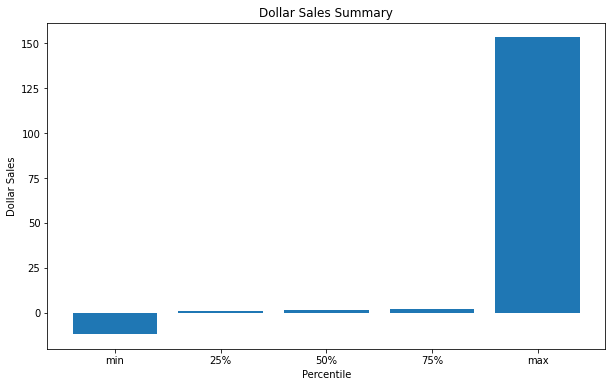

In [30]:
# Convert dollar_sales to float, skipping the first row which may contain non-numeric data
dollar_sales_numeric = df_transaction_joined['dollar_sales'][1:].astype(float)
percentiles = dollar_sales_numeric.quantile([0.0, 0.25, 0.5, 0.75, 1.0])

plt.figure(figsize=(10, 6))
plt.bar(['min', '25%', '50%', '75%', 'max'], percentiles)
plt.title('Dollar Sales Summary')
plt.xlabel('Percentile')
plt.ylabel('Dollar Sales')
plt.show()

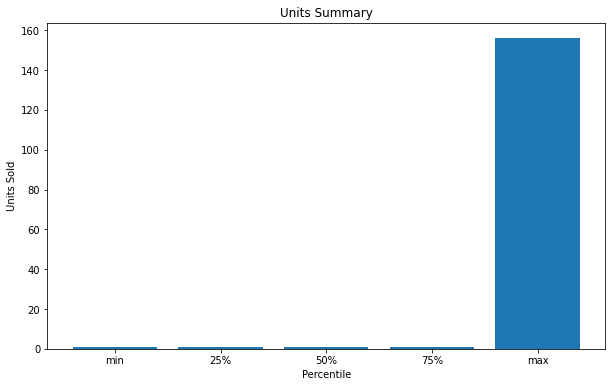

In [31]:
# Convert units to float, skipping the first row which may contain non-numeric data
units_numeric = df_transaction_joined['units'][1:].astype(float)
percentiles = units_numeric.quantile([0.0, 0.25, 0.5, 0.75, 1.0])

plt.figure(figsize=(10, 6))
plt.bar(['min', '25%', '50%', '75%', 'max'], percentiles)
plt.title('Units Summary')
plt.xlabel('Percentile')
plt.ylabel('Units Sold')
plt.show()

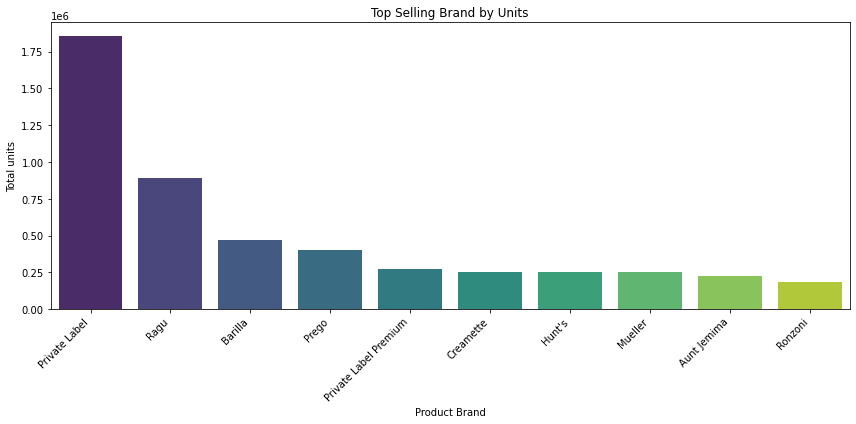

In [32]:
# Group by product description and aggregate by summing  units
top_selling_brand = df_transaction_joined.groupby('brand').agg({'units': 'sum'})

# Sort the DataFrame based on units sold
top_selling_brand = top_selling_brand.sort_values(by='units', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_selling_brand.index, y='units', data=top_selling_brand, palette='viridis')
plt.title('Top Selling Brand by Units')
plt.xlabel('Product Brand')
plt.ylabel('Total units')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

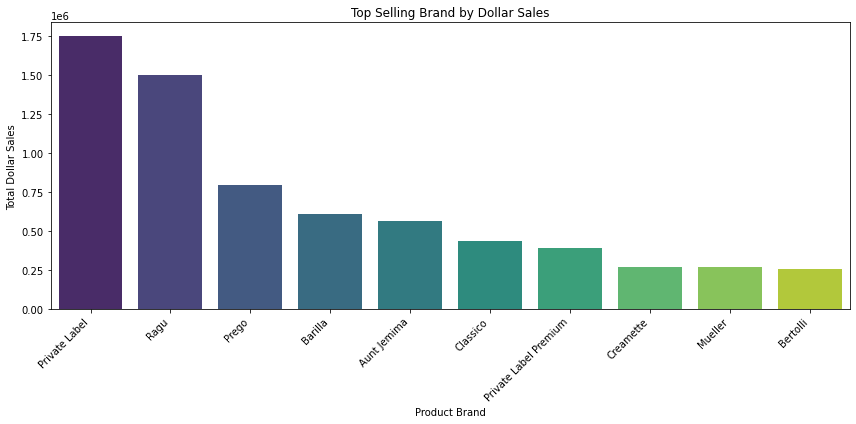

In [33]:
# Group by product description and aggregate by summing dollar_sales or units
top_selling_brand = df_transaction_joined.groupby('brand').agg({'dollar_sales': 'sum'})

# Sort the DataFrame based on dollar_sales or units sold
top_selling_brand = top_selling_brand.sort_values(by='dollar_sales', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_selling_brand.index, y='dollar_sales', data=top_selling_brand, palette='viridis')
plt.title('Top Selling Brand by Dollar Sales')
plt.xlabel('Product Brand')
plt.ylabel('Total Dollar Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

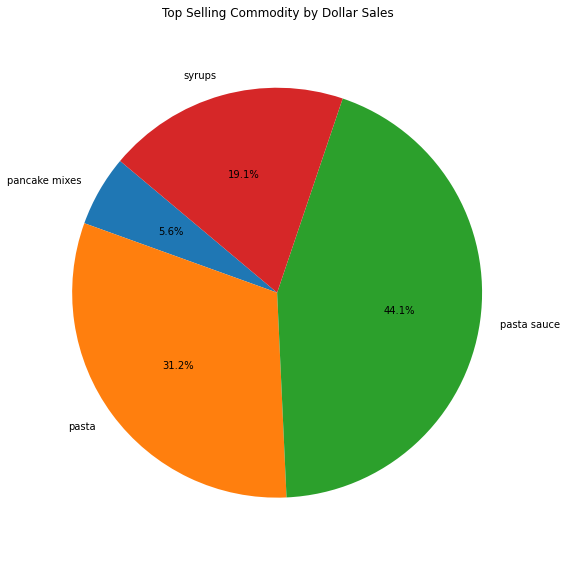

In [34]:
# Group by Commodity and aggregate by summing dollar_sales
top_selling_commodity = df_transaction_joined.groupby('commodity').agg({'dollar_sales': 'sum'})

plt.figure(figsize=(8, 8))
plt.pie(top_selling_commodity['dollar_sales'], labels=top_selling_commodity.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('tab10', len(top_selling_commodity)))
plt.title('Top Selling Commodity by Dollar Sales')
plt.axis('equal')
plt.tight_layout()
plt.show()

### Transaction Patterns: Hourly, Daily, and Monthly Insights

In [35]:
# To count the number of transactions by the timing of transactions in every  hours
df_transaction_joined['time_of_transaction'] = pd.to_datetime(df_transaction_joined['time_of_transaction'])

df_transaction_joined['hour_of_transaction'] = df_transaction_joined['time_of_transaction'].dt.hour
df_transaction_joined['hour_interval'] = df_transaction_joined['time_of_transaction'].dt.strftime('%H:00')

transaction_count = df_transaction_joined.groupby('hour_interval').size().reset_index(name='Transaction Count')
transaction_count

,hour_interval,Transaction Count
0,00:00,28458
1,01:00,14991
2,02:00,7954
3,03:00,5093
4,04:00,3943
5,05:00,5121
6,06:00,11423
7,07:00,30399
8,08:00,80048
9,09:00,152715




*   During peak hours (10:00 to 17:00), businesses should focus on providing excellent customer service and ensuring efficient checkout processes to handle the higher transaction volume.
*   Although we should implement targeted promotions or discounts during off-peak hours (00:00 to 07:00) to attract more customers during these quieter periods.
*   However, that time period  (00:00 to 07:00) probably isn't suitable for spending, so I think we should launch promotions or reduce prices between 20:00. - 22:00. even though it may be. It's a late time, but if we come out with interesting promotions or price reductions, it should be able to help stimulate sales between  20:00. and 22:00.





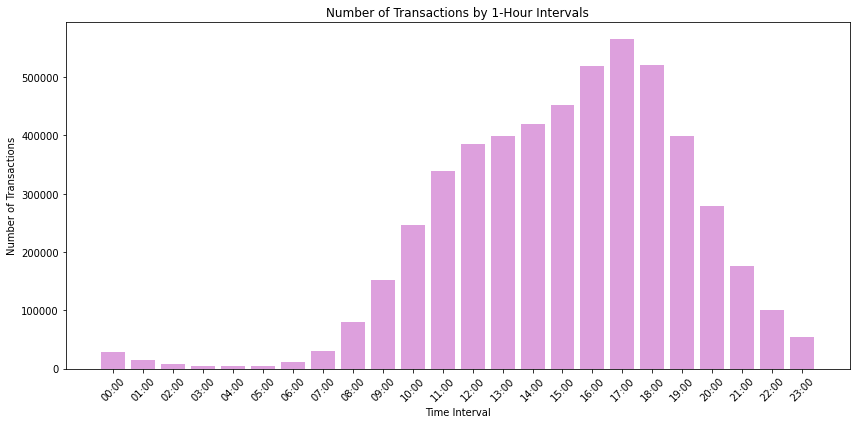

In [36]:
plt.figure(figsize=(12, 6))
plt.bar(transaction_count['hour_interval'], transaction_count['Transaction Count'], color='plum')

plt.xlabel('Time Interval')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by 1-Hour Intervals')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [37]:
# Counting the number of transactions by day and consider the weekly cycle (Assumed day 1 is Sunday)
df_transaction_joined['day_of_week'] = (df_transaction_joined['day'] - 1) % 7 + 1
transaction_count_by_day = df_transaction_joined.groupby('day_of_week').size().reset_index(name='Transaction Count')

print(transaction_count_by_day)

   day_of_week  Transaction Count
0            1             890695
1            2             737498
2            3             647578
3            4             735203
4            5             615351
5            6             672910
6            7             898446


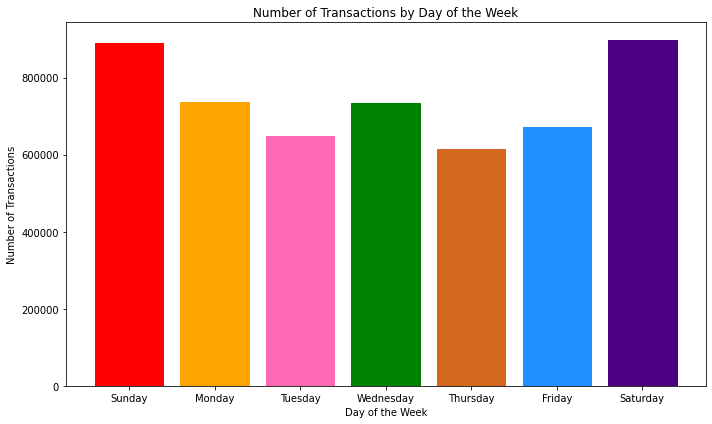

In [38]:
# Plotting the number of transactions by day and consider the weekly cycle (Assumed day 1 is Sunday)
days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_colors = ['red', 'orange', 'hotpink', 'green', 'chocolate', 'dodgerblue', 'indigo']

plt.figure(figsize=(10, 6))
bars = plt.bar(days_of_week, transaction_count_by_day['Transaction Count'])

for i, bar in enumerate(bars):
    bar.set_color(day_colors[i])

plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Day of the Week')

plt.tight_layout()
plt.show()

In [39]:
# Calculate the number of months based on the week
df_transaction_joined['month'] = (df_transaction_joined['week'] - 1) // 4 + 1
df_transaction_joined

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,product_description,commodity,brand,product_size,hour_of_transaction,hour_interval,day_of_week,month
0,7680850106,0.80,1,2024-03-05 11:00:00,2,1,125434,244,1,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ,11,11:00,1,1
1,3620000470,3.59,1,2024-03-05 11:00:00,2,1,125434,244,1,1,0,BERTOLLI TOM&BASIL SAUCE,pasta sauce,Bertolli,24 OZ,11,11:00,1,1
2,1800028064,2.25,1,2024-03-05 11:37:00,2,1,108320,244,2,1,0,H J PANCK BTRMLK COMP MIX,pancake mixes,Hungry Jack,0 Oz,11,11:00,1,1
3,9999985067,0.85,1,2024-03-05 11:48:00,2,1,162016,244,3,1,0,PRIVATE LABEL VERMICELLI,pasta,Private Label,16 OZ,11,11:00,1,1
4,9999985131,2.19,1,2024-03-05 13:23:00,2,1,89437,244,4,1,0,PRIVATE LABEL IMPORTED LASAGNA,pasta,Private Label Premium,16 OZ,13,13:00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197676,9999985001,0.39,1,2024-03-05 23:54:00,1,104,435465,199,3316346,728,0,PRIVATE LABEL THIN SPAGHETTI,pasta,Private Label,7 OZ,23,23:00,7,26
5197677,9999966720,1.05,1,2024-03-05 23:54:00,1,104,435465,199,3316346,728,0,PRIVATE LABEL SPAGHTTI SAUCE MEAT,pasta sauce,Private Label,26 OZ,23,23:00,7,26
5197678,9999985027,0.99,1,2024-03-05 23:11:00,1,104,352690,218,3316347,728,0,PRIVATE LABEL LASAGNA PASTA,pasta,Private Label,16 OZ,23,23:00,7,26
5197679,3620000300,1.53,1,2024-03-05 22:45:00,1,104,55530,93,3316348,728,0,RAGU OWS SPAG SAUCE MEAT,pasta sauce,Ragu,26 OZ,22,22:00,7,26


In [40]:
transaction_count_by_month = df_transaction_joined.groupby('month').size().reset_index(name='Transaction Count')
transaction_count_by_month

,month,Transaction Count
0,1,196739
1,2,188170
2,3,207766
3,4,191098
4,5,187595
5,6,193696
6,7,234244
7,8,198272
8,9,191264
9,10,179036


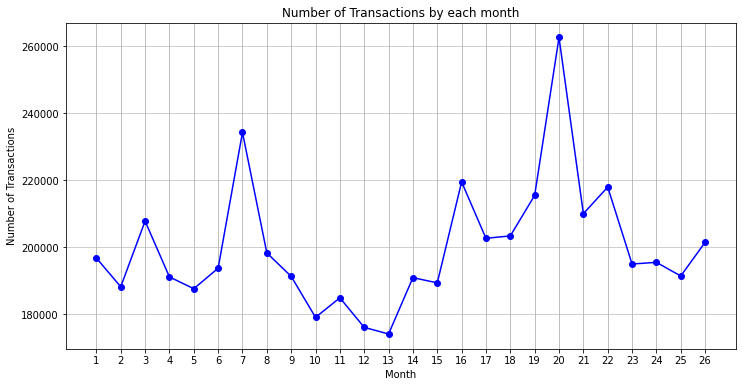

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(transaction_count_by_month['month'], transaction_count_by_month['Transaction Count'], marker='o', color='b', linestyle='-')

plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by each month')

plt.grid(True)

plt.grid(axis='y', alpha=0.75)
plt.xticks(transaction_count_by_month['month'])
plt.show()

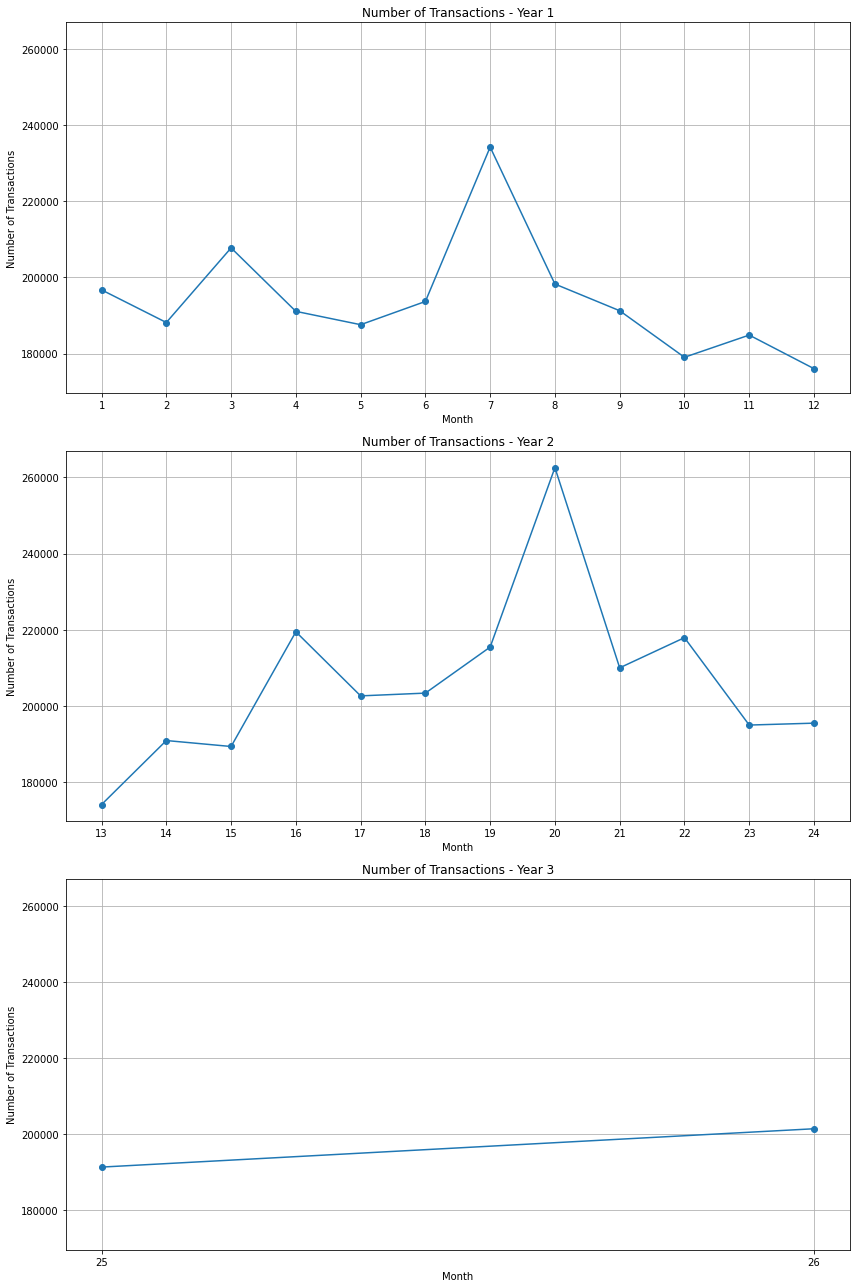

In [42]:
fig, axs = plt.subplots(len(transaction_count_by_month) // 12 + 1, 1, figsize=(12, 6 * (len(transaction_count_by_month) // 12 + 1)))
min_transaction_count = transaction_count_by_month['Transaction Count'].min()
max_transaction_count = transaction_count_by_month['Transaction Count'].max()
margin = 0.05 * (max_transaction_count - min_transaction_count)

for i in range(0, len(transaction_count_by_month), 12):
    group_data = transaction_count_by_month.iloc[i:i+12]
    ax = axs[i // 12]
    ax.plot(group_data['month'], group_data['Transaction Count'], marker='o', linestyle='-')
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Transactions')
    ax.set_title(f'Number of Transactions - Year {i // 12 + 1}')
    ax.set_xticks(group_data['month'])
    ax.set_ylim(min_transaction_count - margin, max_transaction_count + margin)
    ax.grid(True)

plt.tight_layout()
plt.show()

From the graph, the number of transactions appears to increase the most in month 20th and drop to its lowest level in month 13th.

### Analyze the impact of coupons (coupon column) on sales performance.

In [43]:
impact_coupon = df_transaction_joined[['dollar_sales', 'units', 'coupon']]
impact_coupon

,dollar_sales,units,coupon
0,0.80,1,0
1,3.59,1,0
2,2.25,1,0
3,0.85,1,0
4,2.19,1,0
...,...,...,...
5197676,0.39,1,0
5197677,1.05,1,0
5197678,0.99,1,0
5197679,1.53,1,0


In [44]:
# Group data by the 'coupon' column and calculate summary statistics
coupon_stats = impact_coupon.groupby('coupon').agg(
    total_sales=('dollar_sales', 'sum'),
    average_sales=('dollar_sales', 'mean'),
    total_units=('units', 'sum'),
    average_units=('units', 'mean')
).reset_index()

coupon_stats

,coupon,total_sales,average_sales,total_units,average_units
0,0,8996125.92,1.761703,6105223,1.195580
1,1,133953.97,1.468987,114404,1.254595


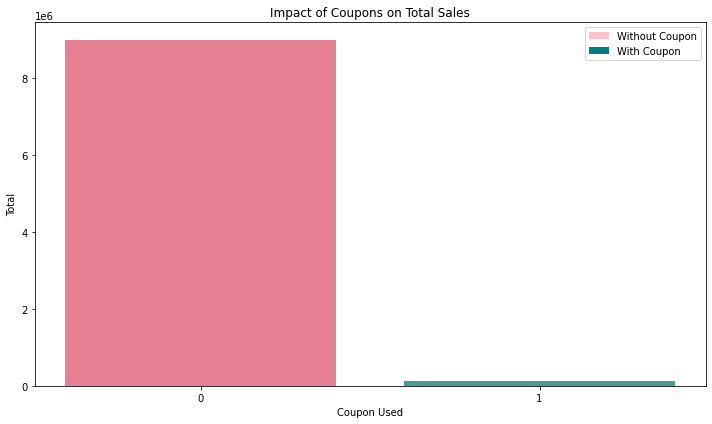

In [45]:
plt.figure(figsize=(10, 6))

sns.barplot(x='coupon', y='total_sales', data=coupon_stats, palette='husl', label='Total Sales')

plt.xlabel('Coupon Used')
plt.ylabel('Total')
plt.title('Impact of Coupons on Total Sales')

# Create a custom legend outside the plot
blue_patch = plt.bar(0, 0, color='pink', label='Without Coupon')
green_patch = plt.bar(0, 0, color='teal', label='With Coupon')
plt.legend(handles=[blue_patch, green_patch], loc='upper right')

plt.tight_layout()
plt.show()

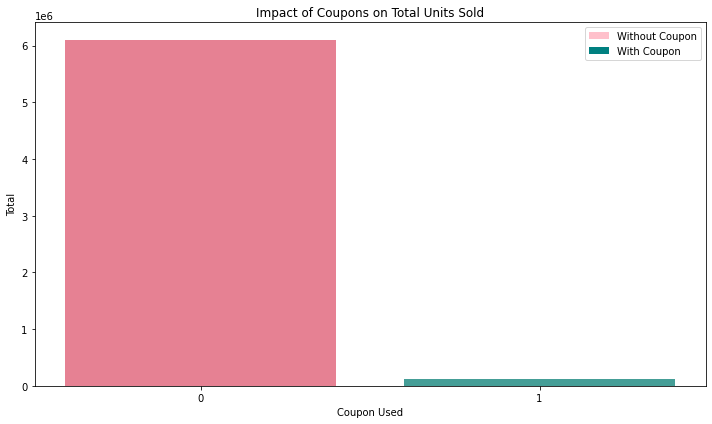

In [46]:
plt.figure(figsize=(10, 6))

sns.barplot(x='coupon', y='total_units', data=coupon_stats, palette='husl', label='Total Units Sold')

plt.xlabel('Coupon Used')
plt.ylabel('Total')
plt.title('Impact of Coupons on Total Units Sold')

# Create a custom legend outside the plot
blue_patch = plt.bar(0, 0, color='pink', label='Without Coupon')
green_patch = plt.bar(0, 0, color='teal', label='With Coupon')
plt.legend(handles=[blue_patch, green_patch], loc='upper right')

plt.tight_layout()
plt.show()

In [47]:
impact_coupon_13th_month = df_transaction_joined[(df_transaction_joined['month'] == 13)][['dollar_sales', 'units', 'coupon']]
impact_coupon_13th_month

,dollar_sales,units,coupon
1507995,1.59,1,0
1507996,0.99,1,0
1507997,1.29,1,0
1507998,2.50,2,0
1507999,1.45,1,0
...,...,...,...
2494703,0.99,1,0
2494704,0.52,1,0
2494894,1.79,1,0
2494929,0.99,1,0


In [48]:
coupon_stats_13th_month = impact_coupon_13th_month.groupby('coupon').agg(
    total_sales=('dollar_sales', 'sum'),
    average_sales=('dollar_sales', 'mean'),
    total_units=('units', 'sum'),
    average_units=('units', 'mean')
).reset_index()

coupon_stats_13th_month

,coupon,total_sales,average_sales,total_units,average_units
0,0,303513.93,1.755004,202762,1.172428
1,1,1679.31,1.478266,1262,1.110915


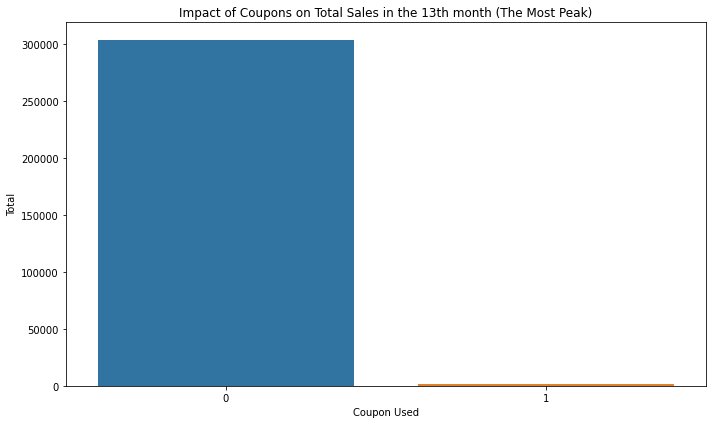

In [49]:
plt.figure(figsize=(10, 6))

sns.barplot(x='coupon', y='total_sales', data=coupon_stats_13th_month)

plt.xlabel('Coupon Used')
plt.ylabel('Total')
plt.title('Impact of Coupons on Total Sales in the 13th month (The Most Peak)')

plt.tight_layout()
plt.show()

### What is the average dollar sales of Pasta Sauce per household?

In [50]:
# Filter the DataFrame to include only transactions involving Pasta Sauce
pasta_sauce_df = df_transaction_joined[df_transaction_joined['commodity'] == 'pasta sauce']

# Group by "household" to calculate the sum and average of "dollar_sales" for each household
sum_dollar_sales = pasta_sauce_df.groupby("household").agg({'dollar_sales': ['sum', 'mean']})
sum_dollar_sales.columns = ['total_dollar_sales', 'average_dollar_sales_per_transaction']
sum_dollar_sales = sum_dollar_sales.round(2)

sum_dollar_sales

,total_dollar_sales,average_dollar_sales_per_transaction
household,,
1,8.91,1.48
2,151.60,3.37
4,1.58,1.58
9,6.11,1.53
10,3.98,1.99
...,...,...
510017,4.77,4.77
510018,7.96,1.99
510021,18.64,1.55


In [51]:
# Calculate the total sum of dollar sales across all households
total_sum_dollar_sales = sum_dollar_sales['total_dollar_sales'].sum()

# Calculate the average dollar sales of pasta sauce per household
average_dollar_sales_per_household = total_sum_dollar_sales / sum_dollar_sales.shape[0]

print(f"The total sum dollar sales of pasta sauce across all households amount to ${total_sum_dollar_sales:.2f}")
print(f"The average dollar sales of pasta sauce per household amount to ${average_dollar_sales_per_household:.2f}")

The total sum dollar sales of pasta sauce across all households amount to $4025026.48
The average dollar sales of pasta sauce per household amount to $11.11


### Distribution of people of Pasta Sauce, Pasta, Pancake Mixes and Syrups buyers also purchase in each Brand.

In [52]:
commodity_and_Brand = df_transaction_joined
commodity_and_Brand

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,product_description,commodity,brand,product_size,hour_of_transaction,hour_interval,day_of_week,month
0,7680850106,0.80,1,2024-03-05 11:00:00,2,1,125434,244,1,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ,11,11:00,1,1
1,3620000470,3.59,1,2024-03-05 11:00:00,2,1,125434,244,1,1,0,BERTOLLI TOM&BASIL SAUCE,pasta sauce,Bertolli,24 OZ,11,11:00,1,1
2,1800028064,2.25,1,2024-03-05 11:37:00,2,1,108320,244,2,1,0,H J PANCK BTRMLK COMP MIX,pancake mixes,Hungry Jack,0 Oz,11,11:00,1,1
3,9999985067,0.85,1,2024-03-05 11:48:00,2,1,162016,244,3,1,0,PRIVATE LABEL VERMICELLI,pasta,Private Label,16 OZ,11,11:00,1,1
4,9999985131,2.19,1,2024-03-05 13:23:00,2,1,89437,244,4,1,0,PRIVATE LABEL IMPORTED LASAGNA,pasta,Private Label Premium,16 OZ,13,13:00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197676,9999985001,0.39,1,2024-03-05 23:54:00,1,104,435465,199,3316346,728,0,PRIVATE LABEL THIN SPAGHETTI,pasta,Private Label,7 OZ,23,23:00,7,26
5197677,9999966720,1.05,1,2024-03-05 23:54:00,1,104,435465,199,3316346,728,0,PRIVATE LABEL SPAGHTTI SAUCE MEAT,pasta sauce,Private Label,26 OZ,23,23:00,7,26
5197678,9999985027,0.99,1,2024-03-05 23:11:00,1,104,352690,218,3316347,728,0,PRIVATE LABEL LASAGNA PASTA,pasta,Private Label,16 OZ,23,23:00,7,26
5197679,3620000300,1.53,1,2024-03-05 22:45:00,1,104,55530,93,3316348,728,0,RAGU OWS SPAG SAUCE MEAT,pasta sauce,Ragu,26 OZ,22,22:00,7,26


#### Pasta Sauce

In [53]:
# Count the number of customers who purchase 'pasta sauce' from each brand
pasta_sauce_df = commodity_and_Brand[df_transaction_joined['commodity'] == 'pasta sauce']

customers_per_brand_pasta_sauce = pasta_sauce_df.groupby(['brand', 'household']).size().reset_index(name='count')
customers_per_brand_pasta_sauce = customers_per_brand_pasta_sauce.groupby('brand')['household'].nunique().reset_index(name='number_of_customers')

top_10_brands_pasta_sauce = customers_per_brand_pasta_sauce.sort_values(by='number_of_customers', ascending=False).head(10)
print(top_10_brands_pasta_sauce)

                    brand  number_of_customers
35                   Ragu               207237
30                  Prego               118132
31          Private Label                90754
21                 Hunt's                69509
13               Classico                58865
6                Bertolli                40187
4                 Barilla                28574
27               Newman's                19330
32  Private Label Premium                16894
18               Emeril's                 9564


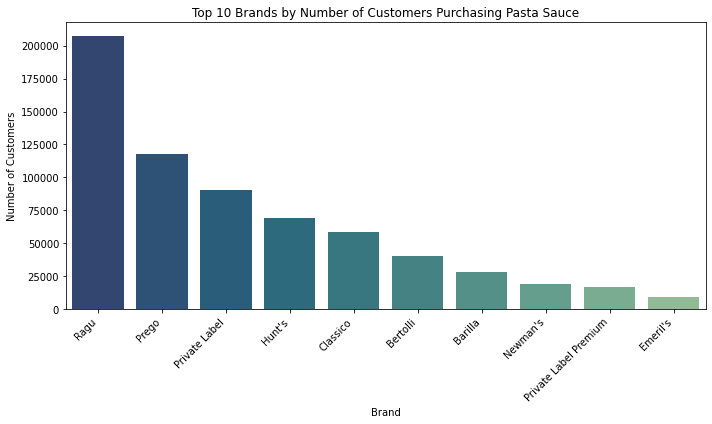

In [54]:
# Plotting a graph in the form of number of customers
plt.figure(figsize=(10, 6))
sns.barplot(x='brand', y='number_of_customers', data=top_10_brands_pasta_sauce, palette='crest_r')
plt.title('Top 10 Brands by Number of Customers Purchasing Pasta Sauce')
plt.xlabel('Brand')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

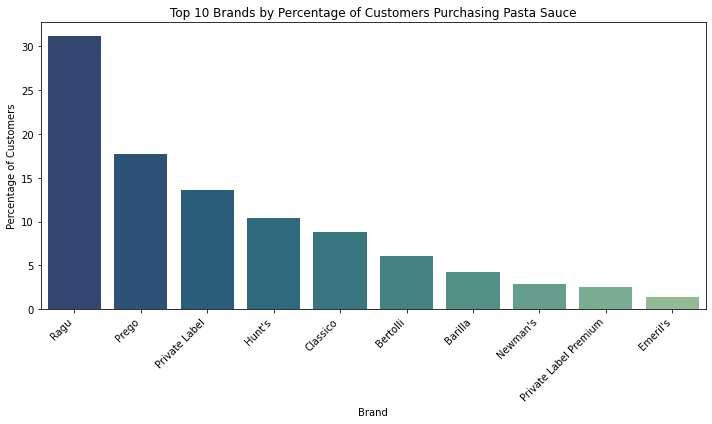

In [55]:
# Plotting a graph in the form of percentage of customers
total_customers_pasta_sauce = customers_per_brand_pasta_sauce['number_of_customers'].sum()

customers_per_brand_pasta_sauce['percentage_of_customers'] = (customers_per_brand_pasta_sauce['number_of_customers'] / total_customers_pasta_sauce) * 100
top_10_brands_percent_pasta_sauce = customers_per_brand_pasta_sauce.sort_values(by='percentage_of_customers', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='brand', y='percentage_of_customers', data=top_10_brands_percent_pasta_sauce, palette='crest_r')
plt.title('Top 10 Brands by Percentage of Customers Purchasing Pasta Sauce')
plt.xlabel('Brand')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Pasta

In [56]:
# Count the number of customers who purchase 'pasta' from each brand
pasta_df = commodity_and_Brand[df_transaction_joined['commodity'] == 'pasta']

customers_per_brand_pasta = pasta_df.groupby(['brand', 'household']).size().reset_index(name='count')
customers_per_brand_pasta = customers_per_brand_pasta.groupby('brand')['household'].nunique().reset_index(name='number_of_customers')

print(customers_per_brand_pasta.head(5))

        brand  number_of_customers
0    Al Dente                  863
1      Alessi                  312
2  Annie Chns                    3
3   Antoine's                    1
4       Arlow                    2


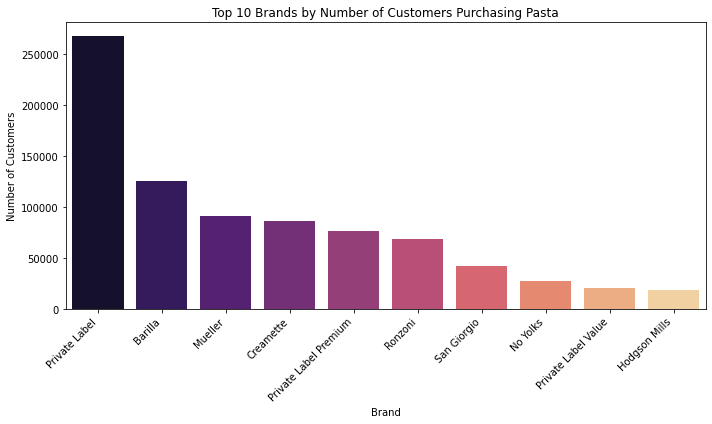

In [57]:
# Plotting a graph in the form of number of customers
top_10_brands_pasta = customers_per_brand_pasta.sort_values(by='number_of_customers', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='brand', y='number_of_customers', data=top_10_brands_pasta, palette='magma')
plt.title('Top 10 Brands by Number of Customers Purchasing Pasta')
plt.xlabel('Brand')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

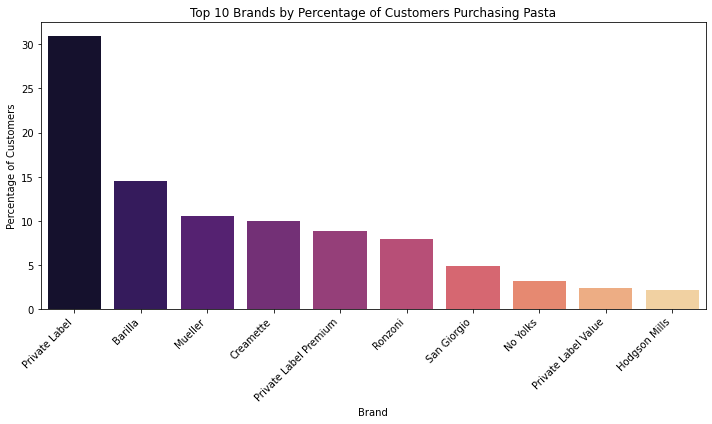

In [58]:
# Plotting a graph in the form of percentage of customers
total_customers_pasta = customers_per_brand_pasta['number_of_customers'].sum()

customers_per_brand_pasta['percentage_of_customers'] = (customers_per_brand_pasta['number_of_customers'] / total_customers_pasta) * 100
top_10_brands_percent_pasta = customers_per_brand_pasta.sort_values(by='percentage_of_customers', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='brand', y='percentage_of_customers', data=top_10_brands_percent_pasta, palette='magma')
plt.title('Top 10 Brands by Percentage of Customers Purchasing Pasta')
plt.xlabel('Brand')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Pancake

         brand  number_of_customers
0  Aunt Jemima                56103
1     Bisquick                 7021
2      Bruce's                  498
3    Classique                  356
4    Fastshake                   24


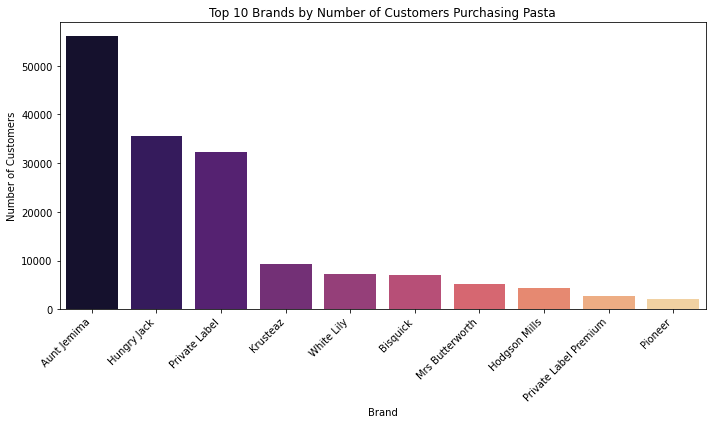

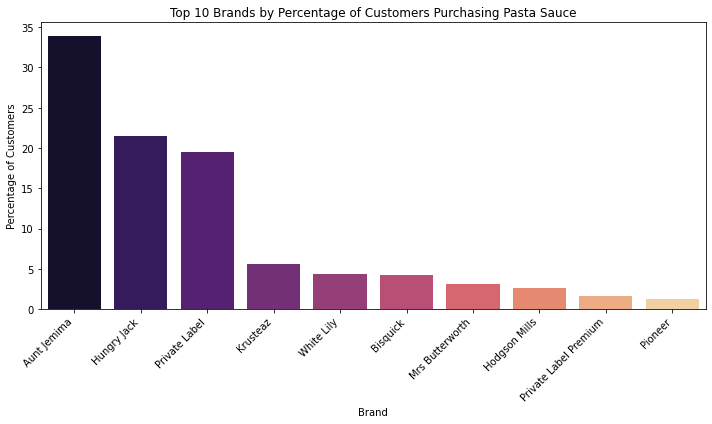

In [59]:
# Count the number of customers who purchase 'Pancake' from each brand
pancake_df = commodity_and_Brand[df_transaction_joined['commodity'] == 'pancake mixes']

customers_per_brand_pancake = pancake_df.groupby(['brand', 'household']).size().reset_index(name='count')
customers_per_brand_pancake = customers_per_brand_pancake.groupby('brand')['household'].nunique().reset_index(name='number_of_customers')

print(customers_per_brand_pancake.head(5))

# Plotting a graph in the form of number of customers
top_10_brands_pancake = customers_per_brand_pancake.sort_values(by='number_of_customers', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='brand', y='number_of_customers', data=top_10_brands_pancake, palette='magma')
plt.title('Top 10 Brands by Number of Customers Purchasing Pasta')
plt.xlabel('Brand')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting a graph in the form of percentage of customers
total_customers_pancake = customers_per_brand_pancake['number_of_customers'].sum()

customers_per_brand_pancake['percentage_of_customers'] = (customers_per_brand_pancake['number_of_customers'] / total_customers_pancake) * 100
top_10_brands_percent_pancake = customers_per_brand_pancake.sort_values(by='percentage_of_customers', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='brand', y='percentage_of_customers', data=top_10_brands_percent_pancake, palette='magma')
plt.title('Top 10 Brands by Percentage of Customers Purchasing Pasta Sauce')
plt.xlabel('Brand')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Syrups

          brand  number_of_customers
0         Alaga                 2135
1   Aunt Jemima                65654
2      Braswell                    1
3  Brier Rabbit                 2129
4        Cary's                 8417


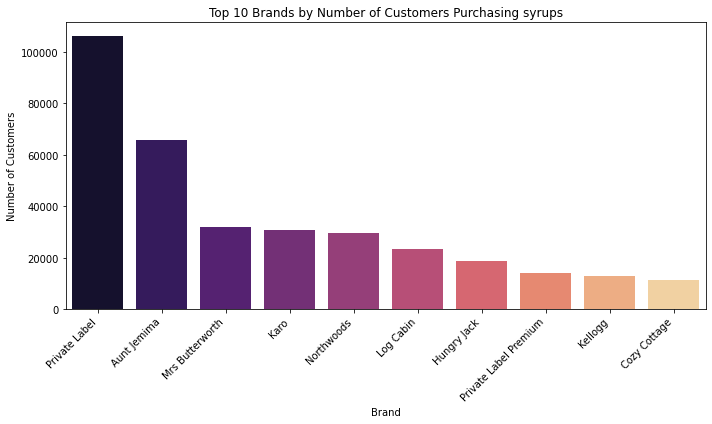

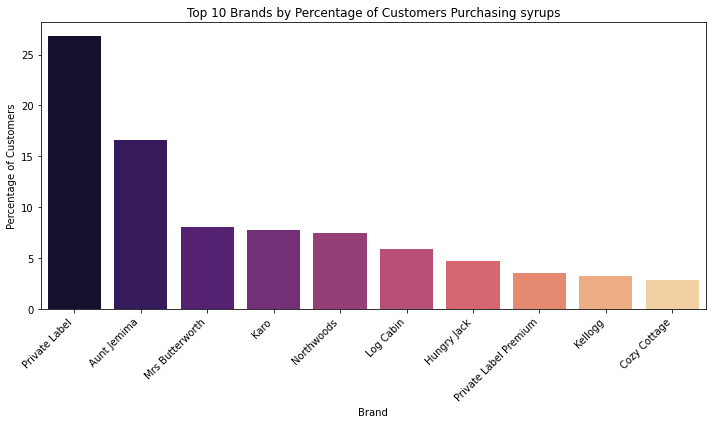

In [60]:
# Count the number of customers who purchase 'Syrups' from each brand
syrups_df = commodity_and_Brand[df_transaction_joined['commodity'] == 'syrups']

customers_per_brand_syrups = syrups_df.groupby(['brand', 'household']).size().reset_index(name='count')
customers_per_brand_syrups = customers_per_brand_syrups.groupby('brand')['household'].nunique().reset_index(name='number_of_customers')

print(customers_per_brand_syrups.head(5))

# Plotting a graph in the form of number of customers
top_10_brands_syrups = customers_per_brand_syrups.sort_values(by='number_of_customers', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='brand', y='number_of_customers', data=top_10_brands_syrups, palette='magma')
plt.title('Top 10 Brands by Number of Customers Purchasing syrups')
plt.xlabel('Brand')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting a graph in the form of percentage of customers
total_customers_syrups = customers_per_brand_syrups['number_of_customers'].sum()

customers_per_brand_syrups['percentage_of_customers'] = (customers_per_brand_syrups['number_of_customers'] / total_customers_syrups) * 100
top_10_brands_percent_syrups = customers_per_brand_syrups.sort_values(by='percentage_of_customers', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='brand', y='percentage_of_customers', data=top_10_brands_percent_syrups, palette='magma')
plt.title('Top 10 Brands by Percentage of Customers Purchasing syrups')
plt.xlabel('Brand')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Brand Loyalty for pasta buyers of 'Private Label'


#### Repeat Purchase Rate (RPR)

Repeat Purchase Rate shows how often buyers come back to repeat a purchase. Because RPR relates directly to the retention rate, it is a reliable reflection of relationships with your customers.

In [61]:
# Calculate the number of unique customers
df_transaction_Private_Pasta = df_transaction_joined[(df_transaction_joined['brand'] == 'Private Label') & (df_transaction_joined['commodity'] == 'pasta')]

total_customers = df_transaction_Private_Pasta['household'].nunique()

print("The total number of customer that purchase pasta of 'Private Label': " + str(total_customers))

The total number of customer that purchase pasta of 'Private Label': 267358


In [62]:
# Calculate the number of customers who made repeat purchases (more than one purchase)
repeat_customers = df_transaction_Private_Pasta['household'].value_counts()[df_transaction_Private_Pasta['household'].value_counts() > 1].count()

# Calculate the Repeat Purchase Rate (RPR)
rpr = (repeat_customers / total_customers) * 100

print("The number of customers who made repeat purchases: " + str(repeat_customers))
print("Repeat Purchase Rate (RPR): {:.2f}%".format(rpr))

The number of customers who made repeat purchases: 157710
Repeat Purchase Rate (RPR): 58.99%


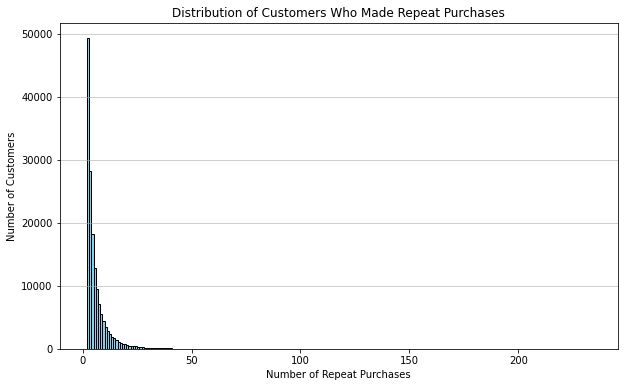

In [63]:
# Count the number of purchases made by each customer
purchase_counts = df_transaction_Private_Pasta['household'].value_counts()

# Filter out customers who made repeat purchases (more than one purchase)
repeat_purchase_counts = purchase_counts[purchase_counts > 1]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(repeat_purchase_counts, bins=range(1, max(repeat_purchase_counts) + 2), color='skyblue', edgecolor='black')
plt.xlabel('Number of Repeat Purchases')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers Who Made Repeat Purchases')
plt.grid(axis='y', alpha=0.75)
plt.show()

#### Customer Lifetime Value (CLV)

CLV is the prediction of the net profit attributed to the entire future relationship with a customer.

CLV = Average Revenue per Customer * Average Lifespan of a Customer



In [64]:
total_revenue = df_transaction_Private_Pasta['dollar_sales'].sum()
total_customers = df_transaction_Private_Pasta['household'].nunique()

average_revenue_per_customer = total_revenue / total_customers


average_lifespan_days = df_transaction_Private_Pasta.groupby('household')['month'].max() - df_transaction_Private_Pasta.groupby('household')['month'].min()
average_lifespan = average_lifespan_days.mean()

CLV = average_revenue_per_customer * average_lifespan

print("Total revenue for 'Private Label' pasta: ${:.2f}".format(total_revenue))
print("Total Customer for 'Private Label' pasta: {:.2f}".format(total_customers))
print("Average revenue per Customer for 'Private Label' pasta: ${:.2f}".format(total_customers))
print("Customer Lifetime Value (CLV) for 'Private Label' pasta: {:.2f}".format(CLV))

Total revenue for 'Private Label' pasta: $995201.26
Total Customer for 'Private Label' pasta: 267358.00
Average revenue per Customer for 'Private Label' pasta: $267358.00
Customer Lifetime Value (CLV) for 'Private Label' pasta: 24.78


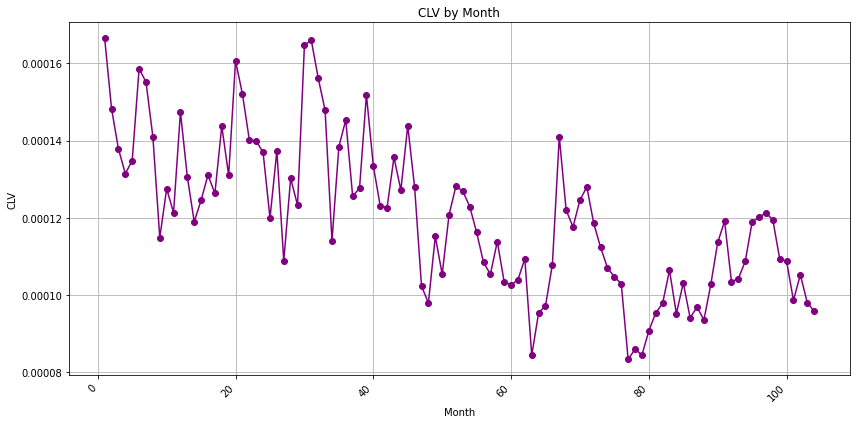

In [65]:
# Calculate CLV for each week
clv_by_month = df_transaction_Private_Pasta.groupby('week').apply(lambda x: x['dollar_sales'].mean() / x['household'].nunique())

plt.figure(figsize=(12, 6))
clv_by_month.plot(kind='line', marker='o', color='purple', linestyle='-')
plt.title('CLV by Month')
plt.xlabel('Month')
plt.ylabel('CLV')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [66]:
# Calculate the Average number of monthly transaction (AMT)
transaction_Private_Pasta_count = df_transaction_Private_Pasta['upc'].count()
total_month = df_transaction_Private_Pasta['month'].nunique()

print("Total number of Private Label's Pasta transactions : {:.2f} times".format(transaction_Private_Pasta_count))
print("Total number of month: " + str(total_month) + " months")

AMT = transaction_Private_Pasta_count/ total_month
print("Average number of monthly transaction : {:.2f} per month".format(AMT))

Total number of Private Label's Pasta transactions : 998961.00 times
Total number of month: 26 months
Average number of monthly transaction : 38421.58 per month


In [67]:
# Calculate the Average order volume (average revenue per transaction) (AOV)
total_revenue = df_transaction_Private_Pasta['dollar_sales'].sum()

print("Total number of Private Label's Pasta transactions : {:.2f} times".format(transaction_Private_Pasta_count))
print("Total revenue: " + str(total_month) + " dollars")

AOV = total_revenue/transaction_Private_Pasta_count
print("Average order volume : {:.2f} per month".format(AOV))

Total number of Private Label's Pasta transactions : 998961.00 times
Total revenue: 26 dollars
Average order volume : 1.00 per month


In [68]:
# Calculate the Average Customer Lifespan (ACL)
transactions_by_customer = df_transaction_Private_Pasta.groupby('household')

customer_lifespans = transactions_by_customer['month'].max() - transactions_by_customer['month'].min()
average_customer_lifespan = customer_lifespans.mean()

print("Average Customer Lifespan: {:.2f} months".format(average_customer_lifespan))

Average Customer Lifespan: 6.66 months


#### RFM Analysis and K-Means Clustering

RFM Analysis is a simple yet powerful method to quantify customer behavior. It evaluates customers based on three key dimensions:

* **Recency (R)**: How recently did a particular customer make a purchase?
* **Frequency (F)**: How often do they make purchases?
* **Monetary Value (M)**: How much money do they spend?

In [69]:
# Remove rows with negative units and dollar_sales
df_transaction_joined = df_transaction_joined[(df_transaction_joined['units'] > 0) & (df_transaction_joined['dollar_sales'] > 0)]

In [70]:
# Find Recency (R)
recency_max = df_transaction_joined.groupby('household')['day'].max()
recency_min = df_transaction_joined.groupby('household')['day'].min()

recency_df = recency_max - recency_min
recency_df = recency_df.reset_index(name='Recency')

In [71]:
# Find Frequency (F)
frequency_df = df_transaction_joined.groupby('household')['week'].nunique().reset_index(name='Frequency')

# Find Monetary Value (M)
monetary_df = df_transaction_joined.groupby('household')['dollar_sales'].sum().reset_index(name='MonetaryValue')

In [72]:
rfm_df = pd.merge(recency_df, frequency_df, on='household')
rfm_df = pd.merge(rfm_df, monetary_df, on='household')

In [73]:
rfm_df

,household,Recency,Frequency,MonetaryValue
0,1,693,11,23.00
1,2,702,65,343.74
2,3,0,1,5.28
3,4,164,2,2.85
4,5,194,3,9.83
...,...,...,...,...
509930,510023,511,5,12.95
509931,510024,0,1,2.34
509932,510025,149,2,3.25
509933,510026,180,3,8.59


In [74]:
rfm_df.describe()

,household,Recency,Frequency,MonetaryValue
count,509935.000000,509935.000000,509935.000000,509935.000000
mean,255001.414135,271.358987,6.163174,17.906045
std,147233.483602,258.833974,8.051491,27.885576
min,1.000000,0.000000,1.000000,0.020000
25%,127489.500000,0.000000,1.000000,3.140000
50%,254993.000000,213.000000,3.000000,7.860000
75%,382513.500000,524.000000,8.000000,20.650000
max,510027.000000,727.000000,98.000000,1105.620000


In [75]:
# Assign RFM scores using quartiles or percentiles
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], q=6, labels=False, duplicates='drop')
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], q=6, labels=False, duplicates='drop')
rfm_df['M_Score'] = pd.qcut(rfm_df['MonetaryValue'], q=6, labels=False, duplicates='drop')

In [76]:
print(rfm_df[['R_Score', 'F_Score', 'M_Score']].head(10))

   R_Score  F_Score  M_Score
0        4        3        4
1        4        4        5
2        0        0        2
3        1        0        1
4        1        1        3
5        0        0        0
6        0        0        0
7        0        0        0
8        2        2        2
9        0        2        3


In [77]:
# Extract RFM scores for K-means clustering
X = rfm_df[['R_Score', 'F_Score', 'M_Score']]

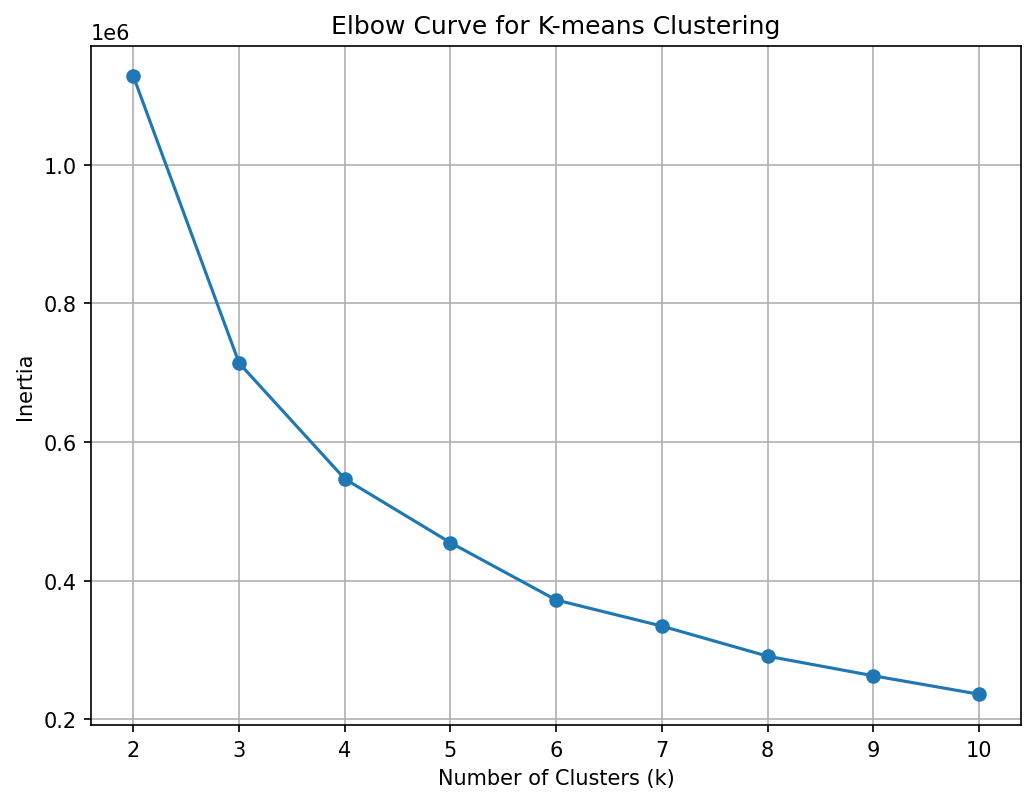

In [78]:
# Calculate inertia (sum of squared distances) for different values of k
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init= 10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6),dpi=150)
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-means Clustering')
plt.grid(True)
plt.show()

We see that the curve elbows out at 4 clusters. So let's divide the customer base into four segments.We've fixed K to 4

In [79]:
# Perform K-means clustering with best K
best_kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
rfm_df['Cluster'] = best_kmeans.fit_predict(X)

In [80]:
# Group by cluster and calculate mean values
cluster_summary = rfm_df.groupby('Cluster').agg({
    'R_Score': 'mean',
    'F_Score': 'mean',
    'M_Score': 'mean'
}).reset_index()

In [81]:
print(cluster_summary)

   Cluster   R_Score   F_Score   M_Score
0        0  3.502768  3.583290  4.589095
1        1  1.049509  0.352854  2.112278
2        2  0.127906  0.002170  0.441254
3        3  2.206353  2.167770  3.209342


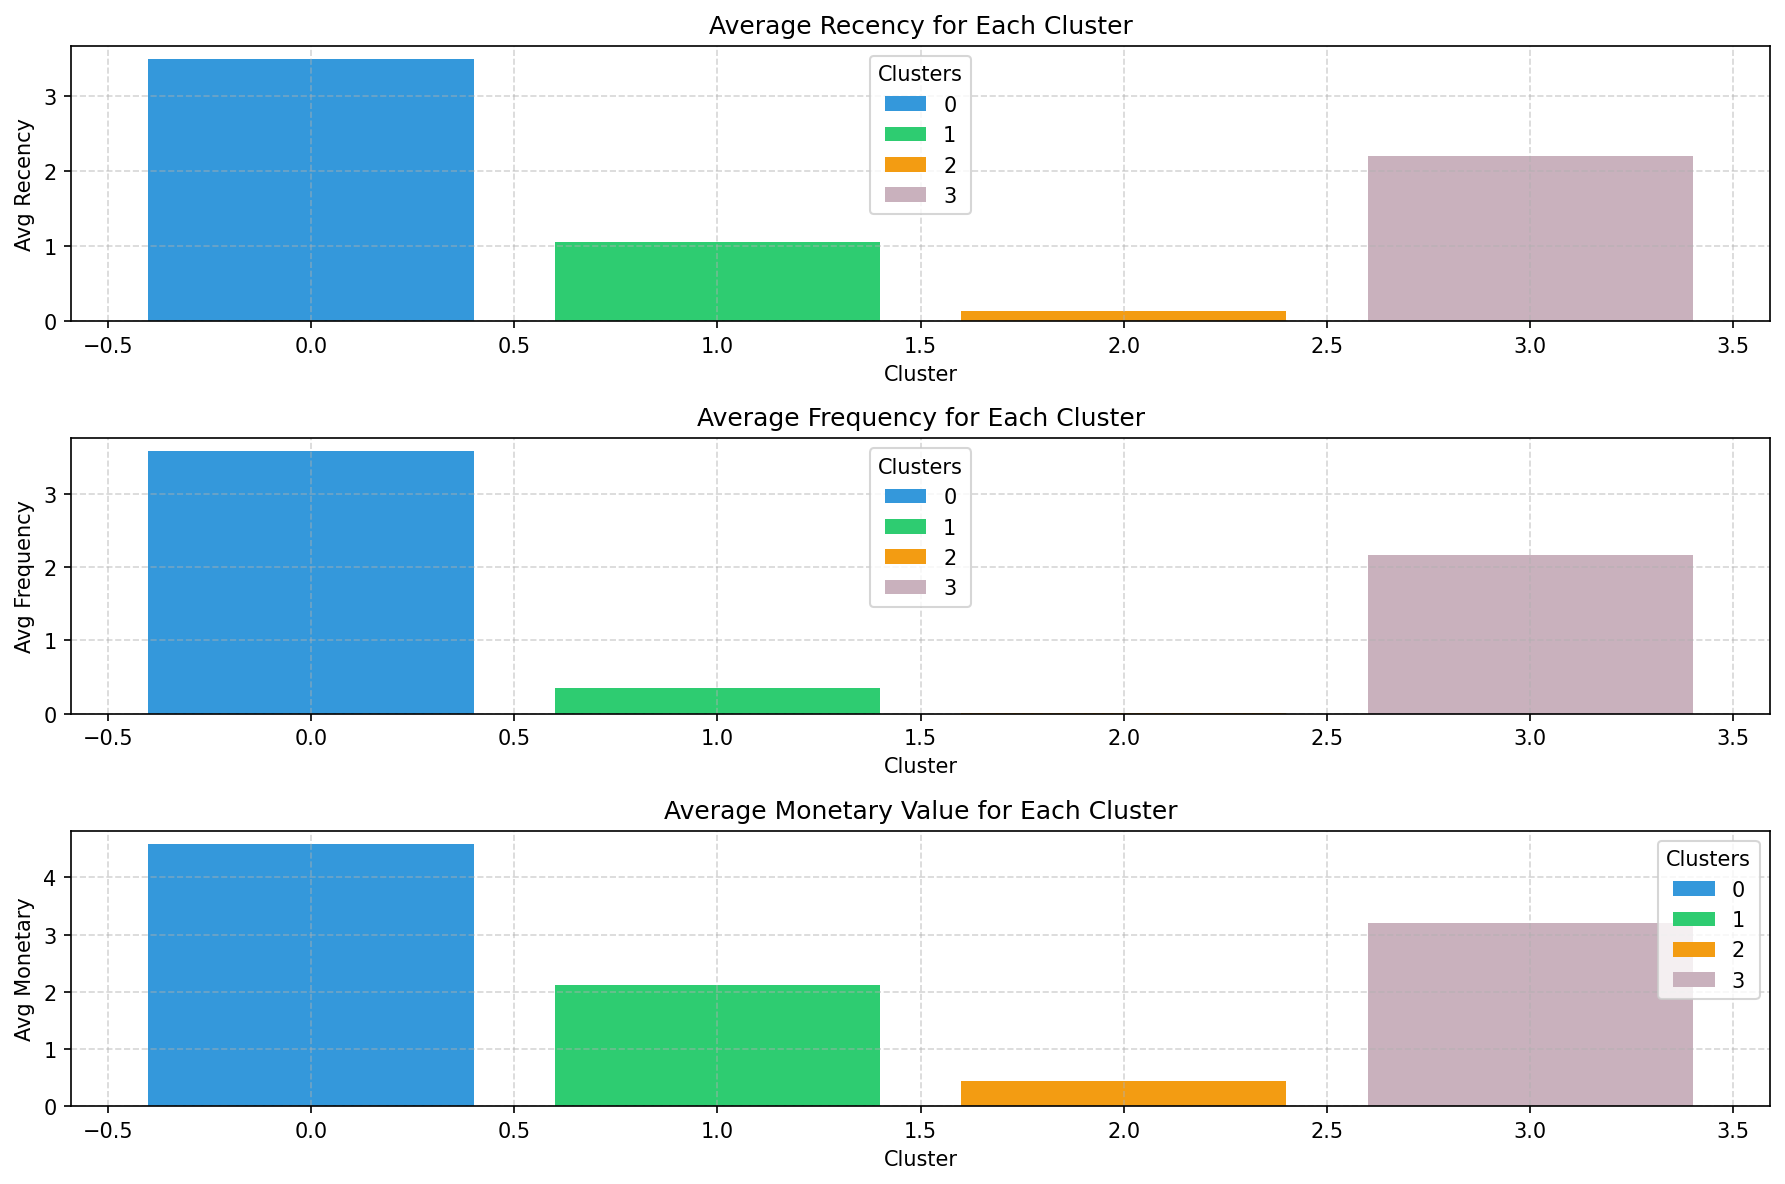

In [82]:
colors = ['#3498db', '#2ecc71', '#f39c12','#C9B1BD']

# Plot the average RFM scores for each cluster
plt.figure(figsize=(12, 8),dpi=150)

# Plot Avg Recency
plt.subplot(3, 1, 1)
bars = plt.bar(cluster_summary.index, cluster_summary['R_Score'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Recency')
plt.title('Average Recency for Each Cluster')

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

# Plot Avg Frequency
plt.subplot(3, 1, 2)
bars = plt.bar(cluster_summary.index, cluster_summary['F_Score'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Frequency')
plt.title('Average Frequency for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

# Plot Avg Monetary
plt.subplot(3, 1, 3)
bars = plt.bar(cluster_summary.index, cluster_summary['M_Score'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Monetary')
plt.title('Average Monetary Value for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

plt.tight_layout()
plt.show()


**Cluster 0 (Champions/Power Shoppers)**: These customers exhibit the highest recency, frequency, and monetary values. Tailored efforts may include personalized special discounts, early access to products, and other premium perks to demonstrate appreciation and value.

**Cluster 1 (Loyal Customers)**: Characterized by moderate recency, frequency, and monetary values, these customers still spend and purchase more frequently compared to other clusters. Marketing efforts can focus on appreciation campaigns, referral bonuses, and rewards for their loyalty.

**Cluster 2 (At-Risk Customers)**: Customers in this cluster tend to spend less, buy infrequently, and haven't made recent purchases. They are potentially inactive or at risk. Re-engagement strategies, such as running discounts or promotions, can be employed to encourage purchasing behavior.

**Cluster 3 (Recent Customers)**: With high recency but relatively lower frequency and moderate monetary values, these customers are recent and have the potential to become long-term patrons. Targeted campaigns aimed at educating them about the brand and offering discounts on subsequent purchases can foster brand loyalty and retention.

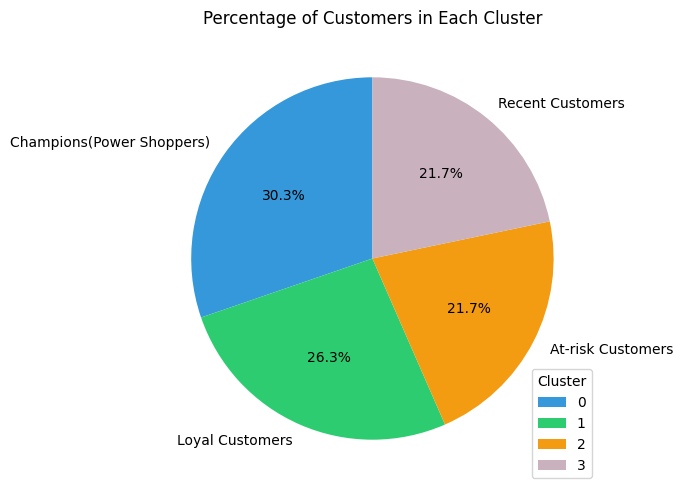

In [83]:
cluster_counts = rfm_df['Cluster'].value_counts()

colors = ['#3498db', '#2ecc71', '#f39c12','#C9B1BD']
# Calculate the total number of customers
total_customers = cluster_counts.sum()

# Calculate the percentage of customers in each cluster
percentage_customers = (cluster_counts / total_customers) * 100

labels = ['Champions(Power Shoppers)','Loyal Customers','At-risk Customers','Recent Customers']

# Create a pie chart
plt.figure(figsize=(12, 6),dpi=100)
plt.pie(percentage_customers, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Customers in Each Cluster')
plt.legend(cluster_summary['Cluster'], title='Cluster', loc='lower right')

plt.show()

Our customer segmentation reveals a relatively even distribution across segments.